In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [17]:
data.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,1.560000,38.850000,60.560000,50.200000,0.915000
std,57.879185,0.497633,13.969007,26.264721,25.823522,0.692947
min,1.000000,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,1.000000,28.750000,41.500000,34.750000,0.000000
50%,100.500000,2.000000,36.000000,61.500000,50.000000,1.000000
75%,150.250000,2.000000,49.000000,78.000000,73.000000,1.000000
max,200.000000,2.000000,70.000000,137.000000,99.000000,2.000000


In [18]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Cluster                   0
dtype: int64

In [3]:
data.dropna(inplace=True)

In [8]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 2})
data['Gender']

0      1
1      1
2      2
3      2
4      2
      ..
195    2
196    2
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int64

In [9]:
selected_features = data[['Gender', 'Age', 'Annual Income (k$)']]

In [10]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

In [11]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

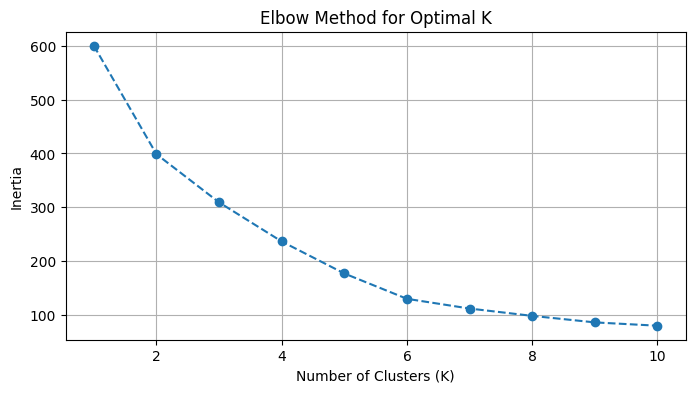

In [12]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


In [13]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
data['Cluster'] = cluster_labels

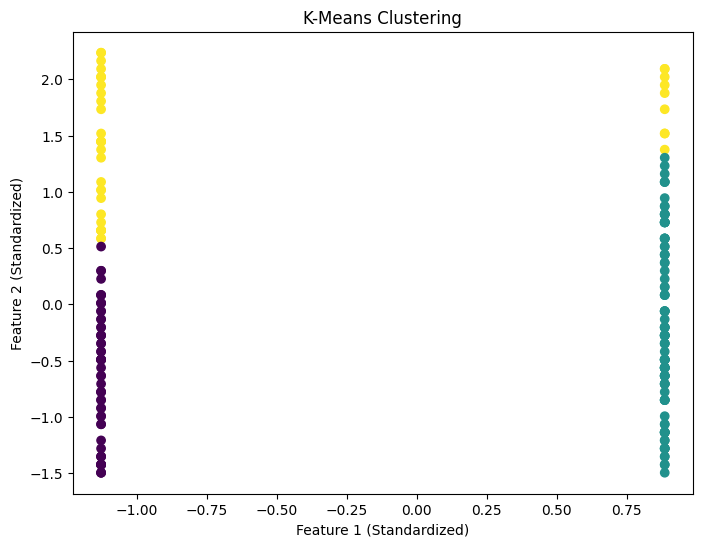

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.show()